# Vaccination Prediction
### Project By- Pruthviraj Shinde
### Email id- me21m086@smail.iitm.ac.in

## Installing the required packages

In [1]:
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 1.4 MB/s eta 0:00:00a 0:00:01


## Importing the required libraries

In [1]:
# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

# Libraries for Problem Transformation

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

# Libraries for model training

from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# Libraries for algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Libraries for testing

from sklearn.metrics import accuracy_score , classification_report

# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# Storing plots

%matplotlib inline

## Loading the dataset into the dataframe

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv', delimiter=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [7]:
features = df.iloc[:,:-1]
labels = df.iloc[:,[33]]
features.drop('unique_id',axis=1,inplace=True)

In [8]:
features.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [9]:
labels.head()

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0


## Checking the shape of dataset

In [10]:
features.shape

(26707, 32)

#### There are 32 features so either we should do PCA or feature selection.

In [11]:
labels.shape

(26707, 1)

## Checking the data types

In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

#### We need to encode the object to int

In [13]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   h1n1_vaccine  26707 non-null  int64
dtypes: int64(1)
memory usage: 208.8 KB


# DATA PRE-PROCESSING

# Checking for duplicates in dataset

In [14]:
features.duplicated().sum()

5

#### There no duplicates in dataset.

In [15]:
labels.duplicated().sum()

26705

## Checking for missing values in dataset

In [16]:
features.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

#### There are lots of missing value so we need to impute them.

In [17]:
labels.isnull().sum()

h1n1_vaccine    0
dtype: int64

## Filling the missing values

In [18]:
# For float fill missing values with the mean

features = features.fillna(features.mean())
features = round(features)

# For string fill missing value with 'No Category'

features = features.fillna('No Category')

In [19]:
listFeat=[]
for col in features.columns:
    listFeat.append(col)

In [20]:
print(listFeat)

['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa', 'no_of_adults', 'no_of_children']


## Finding the unique values of features

In [21]:
for col in features.columns:
    if df[col].dtype=='object':
        print(col)
        print(features[col].unique())

age_bracket
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
qualification
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'No Category']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
sex
['Female' 'Male']
income_level
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'No Category']
marital_status
['Not Married' 'Married' 'No Category']
housing_status
['Own' 'Rent' 'No Category']
employment
['Not in Labor Force' 'Employed' 'Unemployed' 'No Category']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [22]:
for col in features.columns:
    if df[col].dtype=='float64':
        print(col)
        print(features[col].unique())

h1n1_worry
[1. 3. 2. 0.]
h1n1_awareness
[0. 2. 1.]
antiviral_medication
[0. 1.]
contact_avoidance
[0. 1.]
bought_face_mask
[0. 1.]
wash_hands_frequently
[0. 1.]
avoid_large_gatherings
[0. 1.]
reduced_outside_home_cont
[1. 0.]
avoid_touch_face
[1. 0.]
dr_recc_h1n1_vacc
[0. 1.]
dr_recc_seasonal_vacc
[0. 1.]
chronic_medic_condition
[0. 1.]
cont_child_undr_6_mnths
[0. 1.]
is_health_worker
[0. 1.]
has_health_insur
[1. 0.]
is_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
is_h1n1_risky
[1. 4. 3. 2. 5.]
sick_from_h1n1_vacc
[2. 4. 1. 5. 3.]
is_seas_vacc_effective
[2. 4. 5. 3. 1.]
is_seas_risky
[1. 2. 4. 3. 5.]
sick_from_seas_vacc
[2. 4. 1. 5. 3.]
no_of_adults
[0. 2. 1. 3.]
no_of_children
[0. 3. 2. 1.]


## Encoding the object

In [23]:
for col in features.columns:
    if features[col].dtype=='object':
        encoded = LabelEncoder()
        encoded.fit(features[col])
        features[col] = encoded.transform(features[col])

In [24]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

## Checking the dataset

In [25]:
features.head(10)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,3,0,2,2,1,2,2,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,3,1,2,2,2,0,0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,2,1,0,0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,3,0,2,2,2,2,1,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4,3,0,0,0,1,0,0,1.0,0.0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,3,1,0,0,1,0,1,2.0,3.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,1,0,2,1,0,0,0.0,0.0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,4,3,0,0,0,1,0,2,2.0,0.0
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2,3,1,1,0,1,0,0,1.0,0.0
9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,3,1,0,2,1,2,0,0.0,0.0


# EXPLORATORY DATA ANALYSIS

## Checking the statistical information

In [26]:
features.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,...,2.057513,2.570300,0.406223,0.953795,0.932190,1.145542,0.984161,0.833489,0.887558,0.538922
std,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,...,1.435626,0.923226,0.491136,1.113444,0.970936,0.526582,1.052723,0.823313,0.749980,0.924918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,4.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000


## Finding the outliers in dataset

In [27]:
# Function to find the outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

In [28]:
print(len(findoutliers(features.no_of_adults)))
print(len(findoutliers(features.no_of_children)))

1125
1747


In [29]:
findoutliers(features.no_of_adults)

array([3., 3., 3., ..., 3., 3., 3.])

In [30]:
findoutliers(features.no_of_children)

array([3., 3., 3., ..., 3., 3., 3.])

<AxesSubplot:xlabel='no_of_adults'>

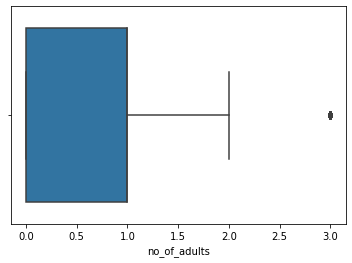

In [31]:
# Visualising the outliers
sns.boxplot(features.no_of_adults)

<AxesSubplot:xlabel='no_of_children'>

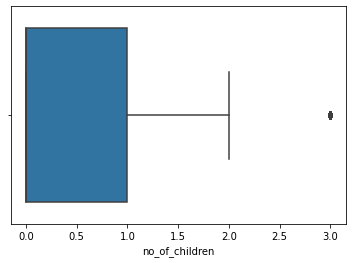

In [32]:
sns.boxplot(features.no_of_children)

#### There are outliers in the dataset but we are not removing them as some algorithms are not sensitive to outliers

# Visualising numerical data

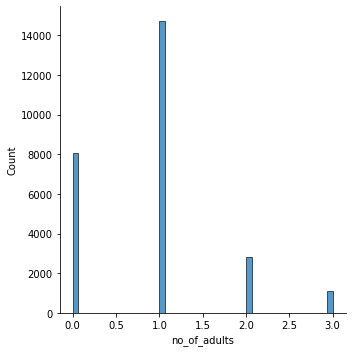

In [33]:
sns.displot(features.no_of_adults)

#### Number of other adults in household is mostly 1.

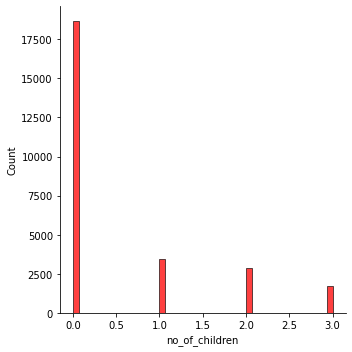

In [35]:
sns.displot(features.no_of_children,color='red')

#### Number of children in household is mostly 0.

## Visualising categorical data

---------------------------------------------------------------------------------------------------------------------------------------------
Categories of age_bracket data 
4    6843
3    5563
2    5238
0    5215
1    3848
Name: age_bracket, dtype: int64
Visualising Categories of age_bracket data 


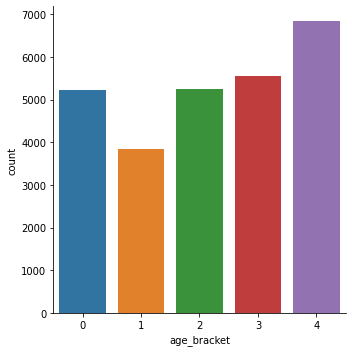

---------------------------------------------------------------------------------------------------------------------------------------------
Categories of qualification data 
2    10097
4     7043
0     5797
1     2363
3     1407
Name: qualification, dtype: int64
Visualising Categories of qualification data 


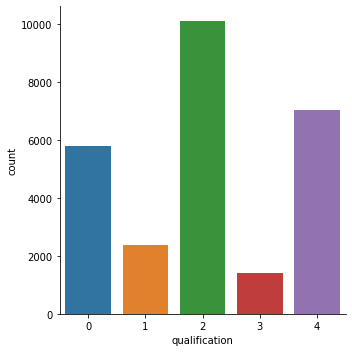

---------------------------------------------------------------------------------------------------------------------------------------------
Categories of race data 
3    21222
0     2118
1     1755
2     1612
Name: race, dtype: int64
Visualising Categories of race data 


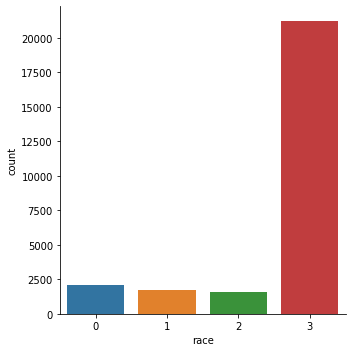

---------------------------------------------------------------------------------------------------------------------------------------------
Categories of sex data 
0    15858
1    10849
Name: sex, dtype: int64
Visualising Categories of sex data 


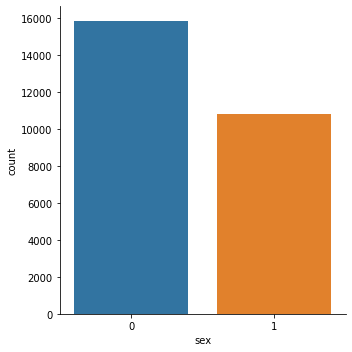

---------------------------------------------------------------------------------------------------------------------------------------------
Categories of income_level data 
0    12777
1     6810
3     4423
2     2697
Name: income_level, dtype: int64
Visualising Categories of income_level data 


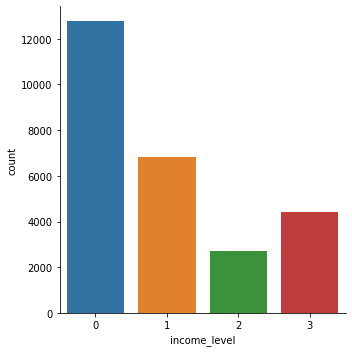

---------------------------------------------------------------------------------------------------------------------------------------------
Categories of marital_status data 
0    13555
2    11744
1     1408
Name: marital_status, dtype: int64
Visualising Categories of marital_status data 


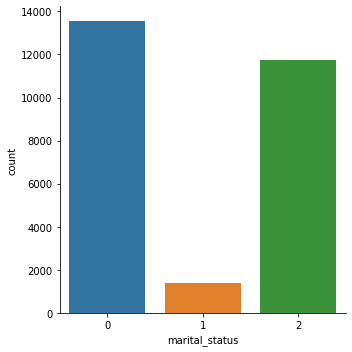

---------------------------------------------------------------------------------------------------------------------------------------------
Categories of housing_status data 
1    18736
2     5929
0     2042
Name: housing_status, dtype: int64
Visualising Categories of housing_status data 


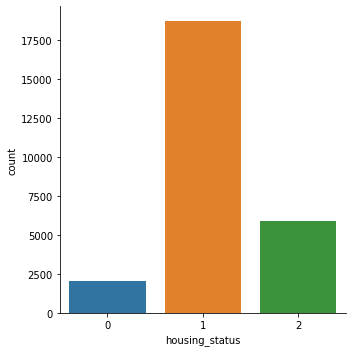

---------------------------------------------------------------------------------------------------------------------------------------------
Categories of employment data 
0    13560
2    10231
1     1463
3     1453
Name: employment, dtype: int64
Visualising Categories of employment data 


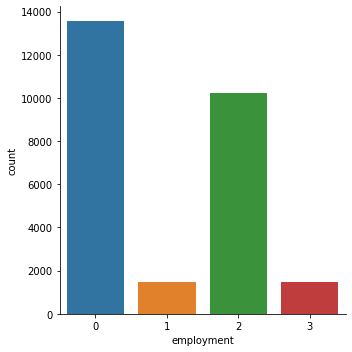

---------------------------------------------------------------------------------------------------------------------------------------------
Categories of census_msa data 
0    11645
1     7864
2     7198
Name: census_msa, dtype: int64
Visualising Categories of census_msa data 


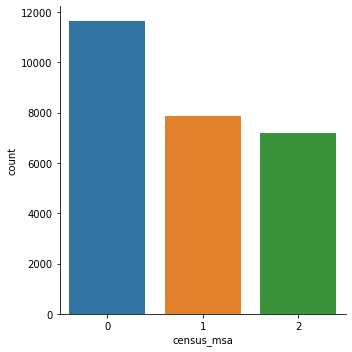

In [38]:
for col in features.columns:
    if features[col].dtype=='int64' and col!='unique_id' :
        print('---------------------------------------------------------------------------------------------------------------------------------------------')
        print('Categories of '+str(col)+' data ')
        print(features[col].value_counts())
        print('Visualising Categories of '+str(col)+' data ')
        sns.catplot(col, data = features, kind = "count")
        plt.show()

## Insights From Data 
#### Most of the people are somewhat concerned about h1n1 vaccine.

#### Almost 90% of people have little or lots of knowledge about h1n1 vaccine.

#### Almost non of the people took antiviral medications.

#### 70% of people have avoided contact with people with symptoms.

#### Very few people have bought a face mask.

#### 80% of people have frequently washed their hands.

#### Few people have reduced time at large gatherings.

#### Only few people have reduced contact with people outside their household.

#### 70% of people have avoided touching eyes, nose, or mouth.

#### Doctors recommended the h1n1 vaccine to only 20% of people.

#### Doctors recommended seasonal vaccine to only 30% of people.

#### Only less than 30% of people have chronic medical conditions.

#### Very few people had close contact with child under 6 months.

#### Very few people work in healthcare.

#### Almost everyone has health insurance.

#### Most of the people think h1n1 is somewhat effective.

#### Most people believe the h1n1 vaccine has somewhat low or very low risk.

#### Most people are not at all worried or not very worried of getting sick from h1n1 vaccine.

#### Most people think seasonal vaccine is somewhat or very effective.

#### Majority of people think the risk of seasonal vaccine are somewhat low.

#### Majority of people are not at all worried of getting sick from seasonal vaccine.

## Visualising labels

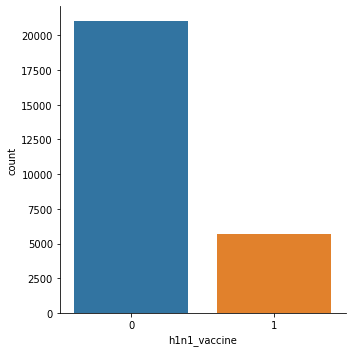

In [39]:
sns.catplot('h1n1_vaccine', data = labels, kind = "count")

# FEATURE SCALING

## Using Min Max scaler

In [40]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [41]:
features = pd.DataFrame(features)
col_name = [ 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
            'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
            'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 
            'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths',
            'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc',
            'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
            'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment',
            'census_msa', 'no_of_adults', 'no_of_children']
features.columns = col_name

# FEATURE SELECTION

## Independent and target variables

In [42]:
X = features
y = labels

## Applying SelectKBest class

In [43]:
bestfeatures = SelectKBest(score_func=chi2, k=30)

In [44]:
fit = bestfeatures.fit(X,y)

In [45]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(25,'Score'))

                        Specs        Score
9           dr_recc_h1n1_vacc  3307.810188
10      dr_recc_seasonal_vacc   892.499456
16              is_h1n1_risky   836.299170
13           is_health_worker   672.405011
19              is_seas_risky   477.567746
11    chronic_medic_condition   172.886102
15     is_h1n1_vacc_effective   167.344330
4            bought_face_mask   123.284462
12    cont_child_undr_6_mnths   109.342915
18     is_seas_vacc_effective    80.935639
0                  h1n1_worry    67.119631
1              h1n1_awareness    55.904059
17        sick_from_h1n1_vacc    50.293380
8            avoid_touch_face    43.065378
2        antiviral_medication    41.109698
26             marital_status    34.131547
5       wash_hands_frequently    25.856864
3           contact_avoidance    15.950408
21                age_bracket    10.942374
7   reduced_outside_home_cont     8.641545
24                        sex     6.776568
6      avoid_large_gatherings     5.614840
23         

In [46]:
features_kbest = features.iloc[:,list(featureScores.nlargest(25,'Score').index)]

## Feature importance using ExtraTrees Classifier

[0.03871803 0.03016238 0.00960239 0.01973294 0.01116479 0.01252629
 0.02010783 0.02075725 0.01948212 0.11462124 0.02731402 0.02023479
 0.01239172 0.02313213 0.00754538 0.06073742 0.06502785 0.03796207
 0.03442543 0.04684036 0.03681037 0.04280837 0.03673711 0.02316561
 0.02437666 0.03433096 0.02138255 0.02386603 0.02734215 0.03750348
 0.0311014  0.02808886]


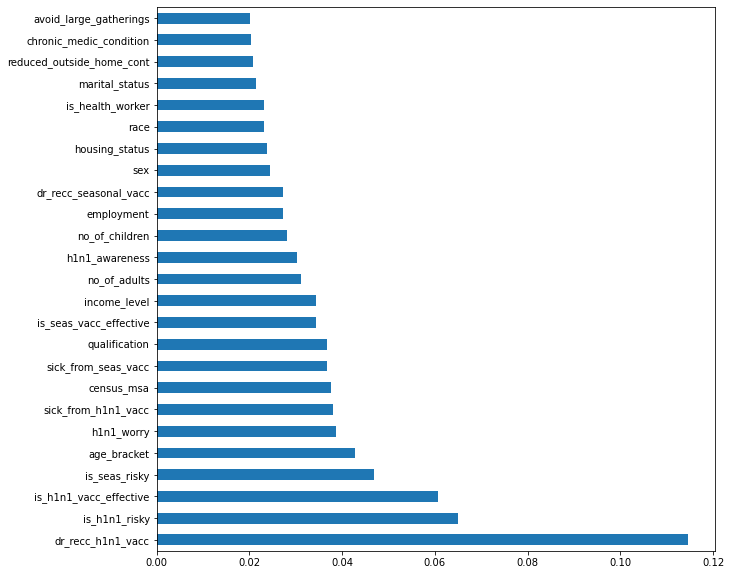

In [50]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [51]:
features_tree = features.loc[:,col_name]

## Correlation Matrix using Heatmap

In [52]:
features.corrwith(labels.h1n1_vaccine)

h1n1_worry                   0.121574
h1n1_awareness               0.117771
antiviral_medication         0.040226
contact_avoidance            0.046837
bought_face_mask             0.070413
wash_hands_frequently        0.074570
avoid_large_gatherings       0.018089
reduced_outside_home_cont    0.022080
avoid_touch_face             0.070855
dr_recc_h1n1_vacc            0.394086
dr_recc_seasonal_vacc        0.218976
chronic_medic_condition      0.094360
cont_child_undr_6_mnths      0.066712
is_health_worker             0.168056
has_health_insur             0.041891
is_h1n1_vacc_effective       0.267352
is_h1n1_risky                0.320580
sick_from_h1n1_vacc          0.074580
is_seas_vacc_effective       0.177799
is_seas_risky                0.255955
sick_from_seas_vacc          0.008415
age_bracket                  0.041074
qualification                0.020766
race                         0.041061
sex                         -0.020672
income_level                -0.012236
marital_stat

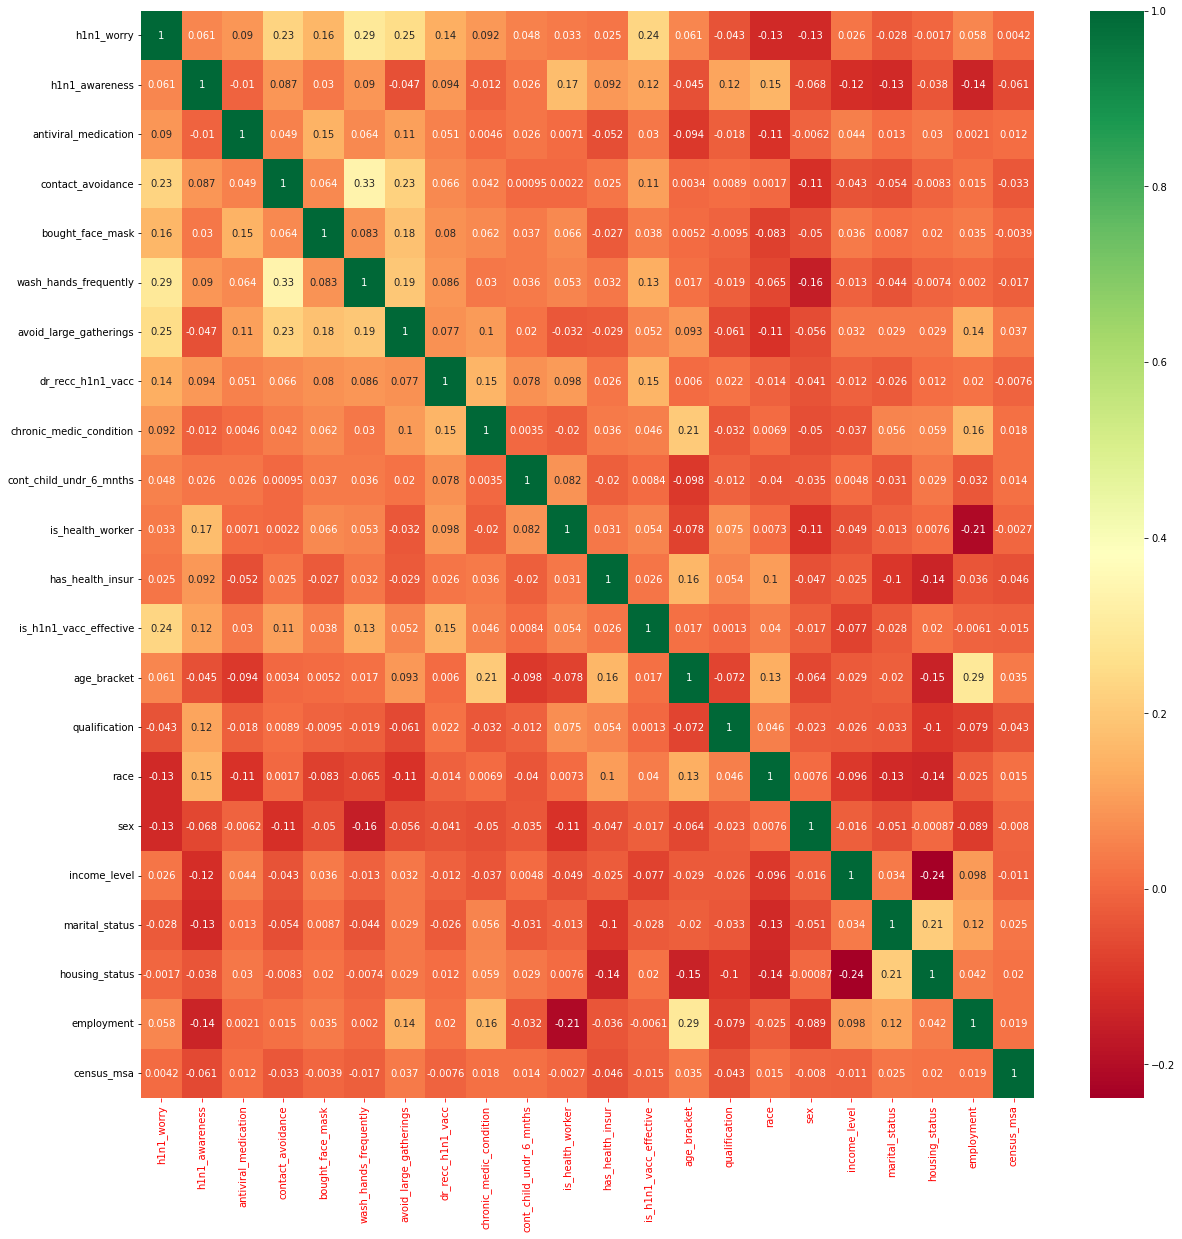

In [53]:
#get correlations of each features in dataset

df2=features.copy()

corr_matrix = df2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.35)]

# Drop features 
df2.drop(to_drop, axis=1, inplace=True)
#df2.info()

%matplotlib inline
opt = df2.corr()
top_cor_feature = opt.index
plt.figure(figsize=(20,20))
k=sns.heatmap(df2[top_cor_feature].corr(),annot=True,cmap='RdYlGn')
k.tick_params(axis='x', colors='red')
plt.show()



# MODEL

## Defining independent and dependent variables

In [55]:
X = df2
y = labels

In [56]:
X

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,dr_recc_h1n1_vacc,chronic_medic_condition,cont_child_undr_6_mnths,...,is_h1n1_vacc_effective,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.75,0.25,1.000000,0.0,0.666667,1.0,0.5,0.666667,1.0
1,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.00,0.25,0.00,1.000000,1.0,0.666667,1.0,1.0,0.000000,0.0
2,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.00,0.50,1.000000,1.0,0.000000,1.0,0.5,0.000000,0.0
3,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.50,1.00,0.00,1.000000,0.0,0.666667,1.0,1.0,0.666667,0.5
4,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.50,0.50,1.00,1.000000,0.0,0.000000,0.0,0.5,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,1.00,1.00,1.000000,0.0,0.000000,1.0,0.5,0.666667,1.0
26703,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.75,0.00,0.50,1.000000,1.0,0.000000,1.0,1.0,0.000000,0.5
26704,0.666667,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.75,0.75,1.00,1.000000,0.0,1.000000,1.0,0.5,0.333333,0.0
26705,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.00,1.00,0.333333,0.0,0.000000,0.0,1.0,0.000000,1.0


In [57]:
y

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
...,...
26702,0
26703,0
26704,0
26705,0


## Splitting the data into training and testing data

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

## Using Binary Relevance - Naive Bayes

In [59]:
# Gaussian Naive Bayes

# Initializing

model_BR_GNB = BinaryRelevance(GaussianNB())

# Training

model_BR_GNB.fit(x_train,y_train)

# Predicting

y_pred_BR_GNB = model_BR_GNB.predict(x_test)
# Testing

y_pred_BR_GNB=pd.DataFrame.sparse.from_spmatrix(y_pred_BR_GNB)
BR_GNB = accuracy_score(y_test,y_pred_BR_GNB)
BR_GNB

0.7670036191189318

## Using Binary Relevance - Decision Tree

In [60]:
# Initializing

model_BR_DT = BinaryRelevance(DecisionTreeClassifier())

# Training

model_BR_DT.fit(x_train,y_train)

# Predicting

y_pred_BR_DT = model_BR_DT.predict(x_test)

# Testing

y_pred_BR_DT=pd.DataFrame.sparse.from_spmatrix(y_pred_BR_DT)

BR_DT = accuracy_score(y_test,y_pred_BR_DT)
BR_DT

0.7400474229377262

## Using Binary Relevance - Logistic Regression

In [61]:
# Initializing

model_BR_LR = BinaryRelevance(LogisticRegression())

# Training

model_BR_LR.fit(x_train,y_train)

# Predicting

y_pred_BR_LR = model_BR_LR.predict(x_test)

# Testing
y_pred_BR_LR=pd.DataFrame.sparse.from_spmatrix(y_pred_BR_LR)

BR_LR = accuracy_score(y_test,y_pred_BR_LR)
BR_LR

0.8284038437538999

## Using Classifier Chains - Naive Bayes

In [62]:
# Gaussian Naive Bayes

# Initializing

model_CC_GNB = ClassifierChain(GaussianNB())

# Training

model_CC_GNB.fit(x_train,y_train)

# Predicting

y_pred_CC_GNB = model_CC_GNB.predict(x_test)

# Testing
y_pred_CC_GNB=pd.DataFrame.sparse.from_spmatrix(y_pred_CC_GNB)

CC_GNB = accuracy_score(y_test,y_pred_CC_GNB)
CC_GNB

0.7670036191189318

## Using Classifier Chains - Decision Tree

In [63]:
# Initializing

model_CC_DT = ClassifierChain(DecisionTreeClassifier())

# Training

model_CC_DT.fit(x_train,y_train)

# Predicting

y_pred_CC_DT = model_CC_DT.predict(x_test)

# Testing
y_pred_CC_DT=pd.DataFrame.sparse.from_spmatrix(y_pred_CC_DT)

CC_DT = accuracy_score(y_test,y_pred_CC_DT)
CC_DT

0.741420192187695

## Using Classifier Chains - Logistic Regression

In [64]:
# Initializing

model_CC_LR = ClassifierChain(LogisticRegression())

# Training

model_CC_LR.fit(x_train,y_train)

# Predicting

y_pred_CC_LR = model_CC_LR.predict(x_test)

# Testing
y_pred_CC_LR =pd.DataFrame.sparse.from_spmatrix(y_pred_CC_LR )

CC_LR = accuracy_score(y_test,y_pred_CC_LR)
CC_LR

0.8284038437538999

## Using Label Powerset - Naive Bayes

In [65]:
# Gaussian Naive Bayes

# Initializing

model_LP_GNB = LabelPowerset(GaussianNB())

# Training

model_LP_GNB.fit(x_train,y_train)

# Predicting

y_pred_LP_GNB = model_LP_GNB.predict(x_test)

# Testing
y_pred_LP_GNB =pd.DataFrame.sparse.from_spmatrix(y_pred_LP_GNB )

LP_GNB = accuracy_score(y_test,y_pred_LP_GNB)
LP_GNB

0.7670036191189318

## Using Label Powerset - Decision Tree

In [66]:
# Initializing

model_LP_DT = LabelPowerset(DecisionTreeClassifier())

# Training

model_LP_DT.fit(x_train,y_train)

# Predicting

y_pred_LP_DT = model_LP_DT.predict(x_test)

# Testing
y_pred_LP_DT =pd.DataFrame.sparse.from_spmatrix(y_pred_LP_DT )

LP_DT = accuracy_score(y_test,y_pred_LP_DT)
LP_DT

0.7441657306876326

## Random Forest

In [67]:
# Initializing

model_RF = RandomForestClassifier()

# Training

model_RF.fit(x_train,y_train)

# Predicting

y_pred_RF = model_RF.predict(x_test)

# Testing

#y_pred_RF =pd.DataFrame.sparse.from_spmatrix(y_pred_RF )
RF = accuracy_score(y_test,y_pred_RF)
RF

0.8170472981405217

# MODEL EVALUATION

## Accuracy score comparison chart

In [68]:
Accuracy_Score = [BR_GNB,BR_DT,BR_LR,CC_GNB,CC_DT,CC_LR,LP_GNB,LP_DT,RF]
Models = ['BR Naive Bayes', 'BR Decision Tree' , 'BR Logistic Regression', 'CC Naive Bayes',
          'CC Decision Tree', 'CC Logistic Regression', 'LP Naive Bayes', 'LP Decision Tree','Random Forest']
Max_Accuracy_Score_index=list(Accuracy_Score).index(max(Accuracy_Score))
print(Models[Max_Accuracy_Score_index])

BR Logistic Regression


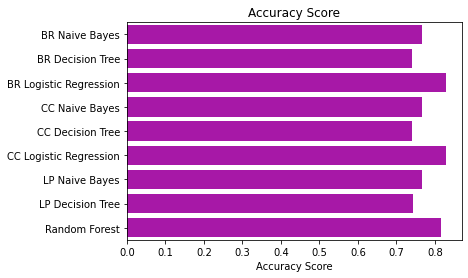

In [69]:
sns.barplot(Accuracy_Score, Models, color="m")
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()

#### Binary Relevance - Logistic Regression HAS THE HIGHEST ACCURACY SCORE